In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

import models.config as config
pd.options.mode.copy_on_write = True

In [2]:
data = pd.read_csv("data/results/results.csv", converters={"district": config.District.from_string})
data

,pre_dissim_wnw,post_dissim_wnw,pre_dissim_bh_wa,post_dissim_bh_wa,district,dissimilarity_weight,population_metric_weight,pre_population_average_divergence,pre_population_median_divergence,post_population_average_divergence,...,switcher_status_quo_time_num_asian,switcher_status_quo_time_num_native,switcher_status_quo_time_num_hispanic,switcher_status_quo_time_num_total,switcher_new_time_num_white,switcher_new_time_num_black,switcher_new_time_num_asian,switcher_new_time_num_native,switcher_new_time_num_hispanic,switcher_new_time_num_total
0,0.635186,0.508774,0.453465,0.370661,"(WA, 5307710)",1,1,0.082111,0.071647,0.048964,...,232652.625567,7806.614583,282012.843763,1.484169e+06,1.911083e+06,7.112383e+05,537030.798944,15620.380833,6.578002e+05,3.286495e+06
1,0.635186,0.565282,0.453465,0.409775,"(WA, 5307710)",0,1,0.082111,0.071647,0.046219,...,233673.343445,6673.969167,245851.311620,1.380984e+06,1.675201e+06,6.605900e+05,518172.295801,11713.659167,5.378748e+05,2.890439e+06
2,0.592172,0.546081,0.575128,0.495727,"(WI, 5509600)",1,1,0.089594,0.074698,0.043678,...,176839.653154,8800.000234,599412.236963,1.896240e+06,3.813152e+05,1.914783e+06,337876.100958,17512.033541,1.227628e+06,3.701838e+06
3,0.592172,0.540829,0.575128,0.488729,"(WI, 5509600)",1,0,0.089594,0.074698,0.122256,...,129539.609444,8084.476327,549610.479586,1.550477e+06,2.610615e+05,1.511936e+06,258605.545451,18439.815338,1.116545e+06,3.021939e+06
4,0.635186,0.485113,0.453465,0.353722,"(WA, 5307710)",1,0,0.082111,0.071647,0.146452,...,186289.613480,7209.785417,244125.248714,1.327097e+06,1.726078e+06,6.521383e+05,438143.242284,12930.391667,5.513226e+05,2.892295e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.434049,0.401711,0.425870,0.398771,"(AZ, 0401870)",0,1,0.067812,0.052686,0.044005,...,189749.547583,33841.962322,599364.264772,1.813440e+06,1.803316e+06,1.613274e+05,319459.850444,64042.947218,1.025229e+06,3.156538e+06
596,0.387727,0.247785,0.325730,0.197257,"(AL, 0100270)",0,1,0.086006,0.061569,0.053596,...,13538.984286,10161.576250,213468.396986,1.776734e+06,3.052726e+06,4.010630e+05,31643.394454,19923.866250,5.071364e+05,3.698300e+06
597,0.089411,0.045363,0.097876,0.063507,"(AZ, 0401680)",1,0,0.062127,0.048394,0.096442,...,4741.153333,12650.221111,933247.477201,1.047791e+06,4.350153e+04,9.902036e+04,6695.113333,17025.492024,1.457659e+06,1.611178e+06
598,0.089411,0.054320,0.097876,0.065457,"(AZ, 0401680)",0,1,0.062127,0.048394,0.041790,...,4055.826667,9102.528651,730669.272739,8.261198e+05,4.092870e+04,9.049158e+04,6152.115000,14625.747937,1.257436e+06,1.400891e+06


In [3]:
dissimilarity = data[
    (data["dissimilarity_weight"] == 1) & (data["population_metric_weight"] == 0)
]
population = data[
    (data["dissimilarity_weight"] == 0) & (data["population_metric_weight"] == 1)
]
both = data[
    (data["dissimilarity_weight"] == 1) & (data["population_metric_weight"] == 1)
]

groups = ["dissimilarity", "population", "both"]
for df in groups:
    locals()[df].drop(["dissimilarity_weight", "population_metric_weight"], inplace=True, axis=1)
    locals()[df].loc[:, "objective"] = df

data = pd.concat([dissimilarity, population, both])

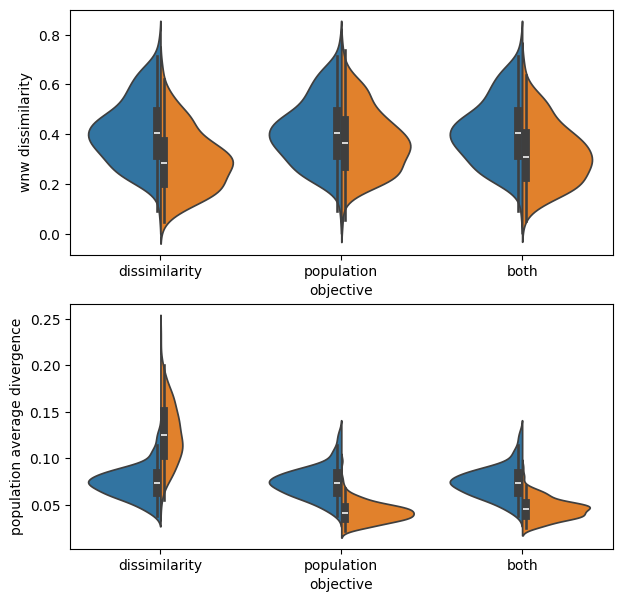

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

melted_first = data.melt(
    value_vars=["pre_dissim_wnw", "post_dissim_wnw"],
    value_name="wnw dissimilarity",
    var_name="pre_or_post",
    id_vars="objective",
)
sns.violinplot(
    x="objective",
    y="wnw dissimilarity",
    data=melted_first,
    split=True,
    hue="pre_or_post",
    ax=axes[0]
)

melted_second = data.melt(
    value_vars=["pre_population_average_divergence", "post_population_average_divergence"],
    value_name="population average divergence",
    var_name="pre_or_post",
    id_vars="objective",
)
sns.violinplot(
    x="objective",
    y="population average divergence",
    data=melted_second,
    split=True,
    hue="pre_or_post",
    ax=axes[1]
)

for axis in axes:
    axis.get_legend().remove()

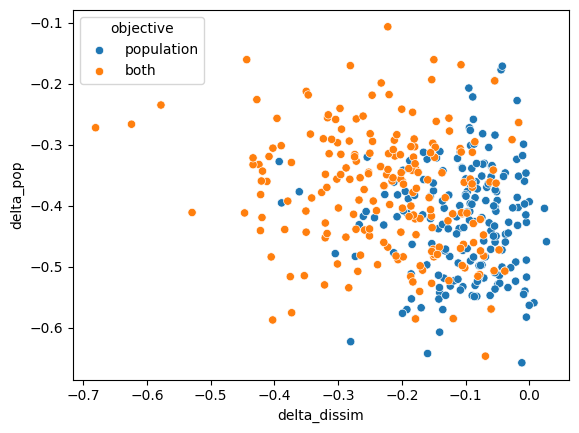

In [5]:
data["delta_dissim"] = (data["post_dissim_wnw"] - data["pre_dissim_wnw"]) / data["pre_dissim_wnw"]
data["delta_pop"] = (data["post_population_average_divergence"] - data["pre_population_average_divergence"]) / data["pre_population_average_divergence"]
sns.scatterplot(
    data=data[(data["delta_pop"] < 0) & (data["objective"] != "dissimilarity")],
    x="delta_dissim",
    y="delta_pop",
    hue="objective"
)
plt.savefig("out.png")

In [6]:
data[(data["delta_pop"] > 0) & (data["objective"] != "dissimilarity")]

,pre_dissim_wnw,post_dissim_wnw,pre_dissim_bh_wa,post_dissim_bh_wa,district,pre_population_average_divergence,pre_population_median_divergence,post_population_average_divergence,post_population_median_divergence,num_white_all,...,switcher_status_quo_time_num_total,switcher_new_time_num_white,switcher_new_time_num_black,switcher_new_time_num_asian,switcher_new_time_num_native,switcher_new_time_num_hispanic,switcher_new_time_num_total,objective,delta_dissim,delta_pop


In [7]:
np.corrcoef(data[(data["delta_pop"] < 0) & (data["objective"] != "dissimilarity")]["delta_dissim"], data[(data["delta_pop"] < 0) & (data["objective"] != "dissimilarity")]["delta_pop"])

array([[ 1.        , -0.23283189],
       [-0.23283189,  1.        ]])

<Axes: xlabel='post_dissim_wnw', ylabel='Count'>

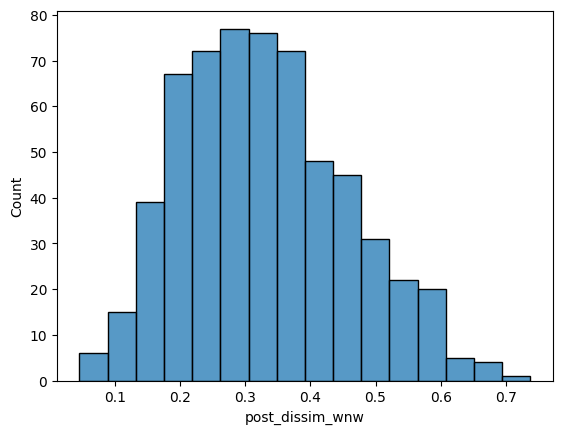

In [8]:
sns.histplot(
    data=data,
    x="post_dissim_wnw"
)

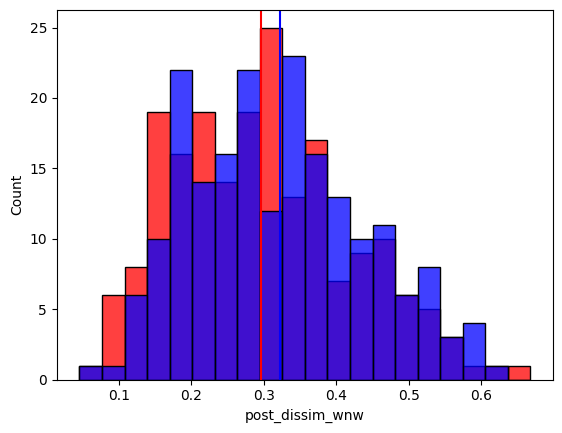

In [9]:
def add_the_hist(data, bins, color, column="post_dissim_wnw"):
    sns.histplot(
        data=data,
        x="post_dissim_wnw",
        bins=bins,
        color=color,
    )
    plt.axvline(np.mean(data[column]), color=color)


bins = np.histogram(dissimilarity["post_dissim_wnw"], bins=20)[1]
add_the_hist(dissimilarity, bins, "red")
# add_the_hist(dissimilarity, bins, "green", "pre_dissim_wnw")
# add_the_hist(population, bins, "yellow")
add_the_hist(both, bins, "blue")

<Axes: xlabel='delta_dissim', ylabel='delta_pop'>

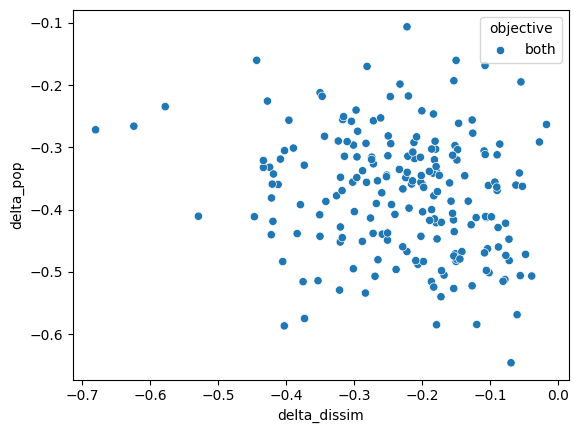

In [10]:
sns.scatterplot(
    data=data[data["objective"] == "both"],
    x="delta_dissim",
    y="delta_pop",
    hue="objective",
)

array([[ 1.        , -0.06475716],
       [-0.06475716,  1.        ]])

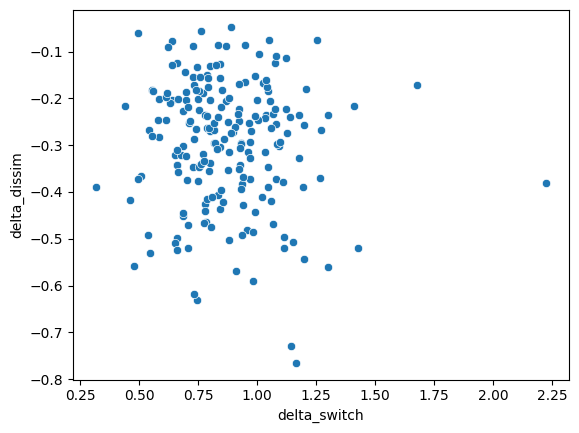

In [11]:
data["delta_switch"] = (data["switcher_new_time_num_total"] - data["switcher_status_quo_time_num_total"]) / data["switcher_status_quo_time_num_total"]
sns.scatterplot(
    data=data[data["objective"] == "dissimilarity"],
    y="delta_dissim",
    x="delta_switch",
)
np.corrcoef(data[data["objective"] == "dissimilarity"]["delta_dissim"], data[data["objective"] == "dissimilarity"]["delta_switch"])

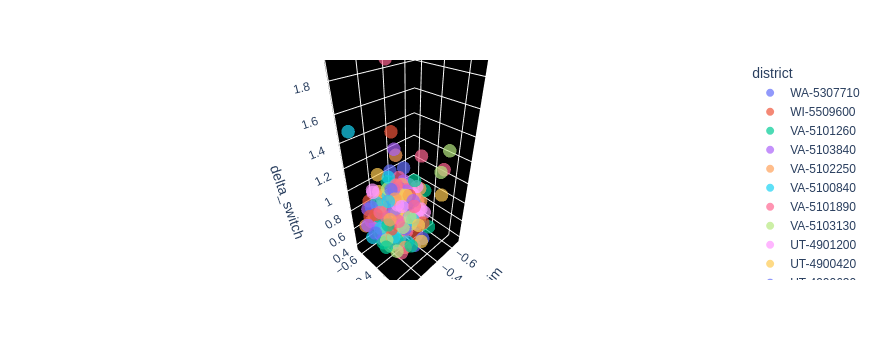

In [14]:
fig = px.scatter_3d(data[data["objective"] == "both"],
                    x="delta_dissim", y="delta_pop", z="delta_switch",
                    color="district", opacity=0.7)
fig.update_scenes(xaxis_backgroundcolor="black")
fig.update_scenes(yaxis_backgroundcolor="black")
fig.update_scenes(zaxis_backgroundcolor="black")
fig.show()

(pre_dissim_wnw                                 0.387727
 post_dissim_wnw                                 0.09116
 pre_dissim_bh_wa                                0.32573
 post_dissim_bh_wa                              0.084015
 district                                  (AL, 0100270)
 pre_population_average_divergence              0.086006
 pre_population_median_divergence               0.061569
 post_population_average_divergence             0.187576
 post_population_median_divergence              0.175949
 num_white_all                                    9296.0
 num_black_all                                    1422.0
 num_hispanic_all                                 1601.0
 num_native_all                                     41.0
 num_asian_all                                     110.0
 num_pacific_islander_all                            8.0
 num_two_or_more_all                              1213.0
 num_not_specified_all                               0.0
 num_total_all                 

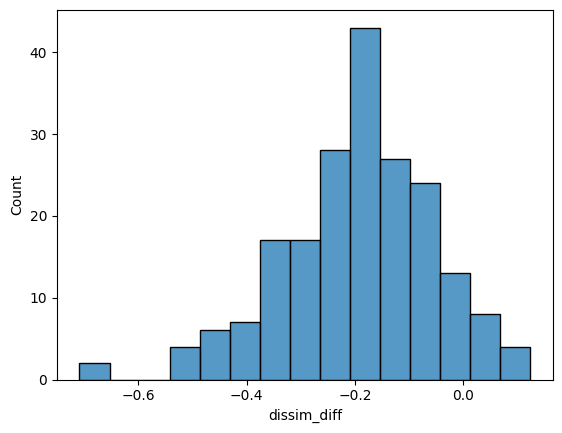

In [13]:
def data_for(objective):
    return data[data["objective"] == objective].reset_index(drop=True)

dissim_diff_data = data_for("dissimilarity")
dissim_diff_data["dissim_diff"] = dissim_diff_data["delta_dissim"] - data_for("population")["delta_dissim"]
sns.histplot(dissim_diff_data["dissim_diff"])
min_idx = dissim_diff_data.idxmin()["dissim_diff"]
dissim_diff_data.iloc[min_idx], data_for("population").iloc[min_idx]